# Appendix B:  R Code

# IST 772 Final Exam
**Submitted by:** Andrea Bradshaw  
**Due Date:** 06/27/2021  
**Attestation Statement:**  I did this work by myself  

In [1]:
load(file = "allSchoolsReportStatus.RData")
load(file = "usVaccines.RData")
load(file = "districts.RData")
df <- districts

In [2]:
str(usVaccines)

 Time-Series [1:38, 1:5] from 1980 to 2017: 83 84 83 84 84 85 88 88 89 81 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:5] "DTP1" "HepB_BD" "Pol3" "Hib3" ...


In [3]:
summary(usVaccines)

      DTP1          HepB_BD           Pol3            Hib3      
 Min.   :81.00   Min.   :11.00   Min.   :24.00   Min.   :52.00  
 1st Qu.:89.75   1st Qu.:17.00   1st Qu.:90.00   1st Qu.:87.00  
 Median :97.00   Median :19.00   Median :93.00   Median :91.00  
 Mean   :94.05   Mean   :34.21   Mean   :87.16   Mean   :89.21  
 3rd Qu.:98.00   3rd Qu.:54.50   3rd Qu.:94.00   3rd Qu.:93.00  
 Max.   :99.00   Max.   :74.00   Max.   :97.00   Max.   :94.00  
      MCV1      
 Min.   :82.00  
 1st Qu.:90.00  
 Median :92.00  
 Mean   :91.24  
 3rd Qu.:92.00  
 Max.   :98.00  

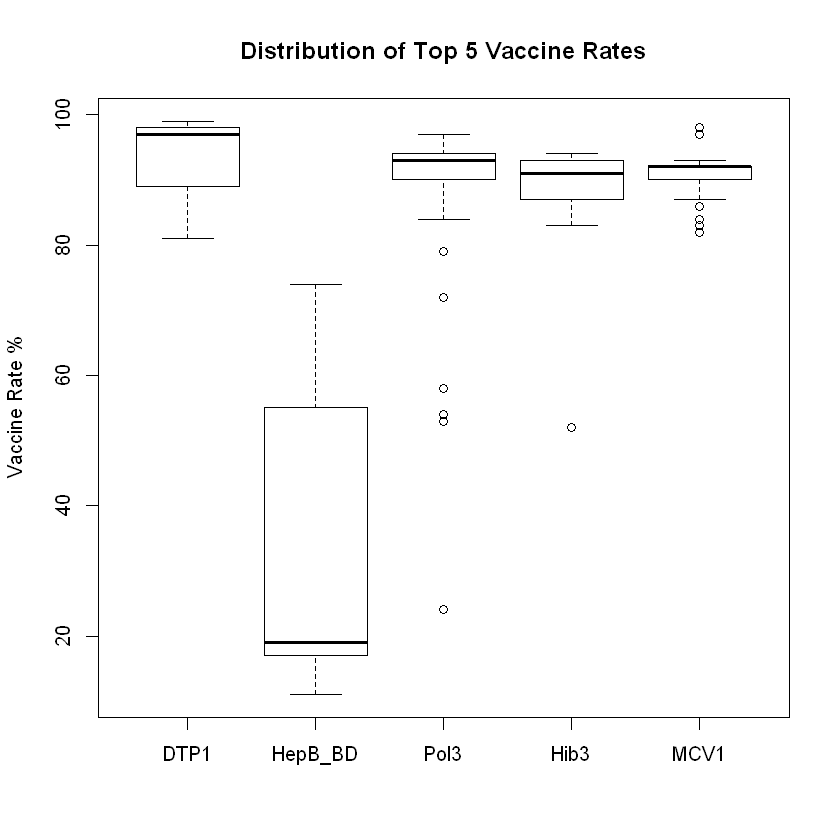

In [4]:
boxplot(usVaccines, main = "Distribution of Top 5 Vaccine Rates", ylab="Vaccine Rate %")

In [5]:
str(allSchoolsReportStatus)

'data.frame':	7381 obs. of  3 variables:
 $ name    : chr  "AGUA DULCE ELEMENTARY" "MEADOWLARK ELEMENTARY" "CALIFORNIA SCHOOL FOR THE DEAF-FREMONT" "HIDDEN VALLEY ELEMENTARY" ...
 $ pubpriv : chr  "PUBLIC" "PUBLIC" "PUBLIC" "PUBLIC" ...
 $ reported: chr  "Y" "Y" "Y" "Y" ...


In [6]:
summary(allSchoolsReportStatus)

     name             pubpriv            reported        
 Length:7381        Length:7381        Length:7381       
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

In [7]:
str(districts)

'data.frame':	700 obs. of  13 variables:
 $ DistrictName    : chr  "Lakeside Joint" "Williams Unified" "Southern Humboldt Joint Unified" "Buena Park Elementary" ...
 $ WithoutDTP      : num  14 1 60 1 3 1 2 6 4 13 ...
 $ WithoutPolio    : num  14 1 60 1 2 0 2 6 4 13 ...
 $ WithoutMMR      : num  21 1 60 1 3 0 2 6 4 13 ...
 $ WithoutHepB     : num  14 1 60 1 1 0 2 5 1 12 ...
 $ PctUpToDate     : num  79 99 40 98 96 99 98 92 94 84 ...
 $ DistrictComplete: logi  TRUE TRUE FALSE TRUE TRUE FALSE ...
 $ PctBeliefExempt : num  7 1 60 1 0 0 2 4 0 4 ...
 $ PctChildPoverty : num  7 16 31 21 23 37 16 9 29 13 ...
 $ PctFreeMeal     : num  2 69 41 65 72 93 54 33 82 34 ...
 $ PctFamilyPoverty: num  2 9 17 10 11 23 7 4 18 7 ...
 $ Enrolled        : num  14 122 15 626 255 ...
 $ TotalSchools    : num  1 1 3 6 3 2 8 9 38 11 ...


In [8]:
summary(districts)

 DistrictName         WithoutDTP     WithoutPolio     WithoutMMR   
 Length:700         Min.   : 0.00   Min.   : 0.00   Min.   : 0.00  
 Class :character   1st Qu.: 3.00   1st Qu.: 3.00   1st Qu.: 3.00  
 Mode  :character   Median : 7.00   Median : 6.00   Median : 6.00  
                    Mean   :10.02   Mean   : 9.63   Mean   :10.07  
                    3rd Qu.:14.00   3rd Qu.:13.00   3rd Qu.:14.00  
                    Max.   :77.00   Max.   :77.00   Max.   :77.00  
  WithoutHepB      PctUpToDate     DistrictComplete PctBeliefExempt 
 Min.   : 0.000   Min.   : 23.00   Mode :logical    Min.   : 0.000  
 1st Qu.: 2.000   1st Qu.: 84.00   FALSE:42         1st Qu.: 1.000  
 Median : 4.000   Median : 92.00   TRUE :658        Median : 2.000  
 Mean   : 7.639   Mean   : 88.05                    Mean   : 5.579  
 3rd Qu.:10.000   3rd Qu.: 96.00                    3rd Qu.: 7.000  
 Max.   :77.000   Max.   :100.00                    Max.   :77.000  
 PctChildPoverty  PctFreeMeal     PctFami

In [9]:
Avg = rowSums(usVaccines)/5
usVaccinesWAvg <- cbind(usVaccines, Avg)
colnames(usVaccinesWAvg) <- c("DTP1", "HepB_BD", "Pol3", "Hib3", "MCV1", "Avg")
# head(usVaccines)

# Descriptive Analysis
## Vaccination Rates Over Time

### Average of Top 5 Vaccination Rates Combined

In [89]:
# install.packages("dygraphs")
library(dygraphs)
library(htmlwidgets)
#writeLines("div[id^='htmlwidget_container'] { border:1px solid black; padding:10px}",            "my.css")
dygraph(usVaccinesWAvg[, 6], ylab="Vaccine Rate %", xlab="Year", main="Avg Top 5 Vaccine Rates 1980 - 2017") %>%
  dyCSS("my.css") %>% 
  dyOptions(drawPoints = TRUE, pointSize = 3, drawGapEdgePoints=TRUE) %>%
  dyCallbacks(underlayCallback=JS("function(ctx, area, dygraph) {
                         ctx.strokeStyle = 'black';
                         ctx.strokeRect(area.x, area.y, area.w, area.h);
                     }"))

HTML widgets cannot be represented in plain text (need html)

#### Difference Over Time

In [90]:
install.packages("changepoint")
library(changepoint)
diffVacc <- diff(usVaccinesWAvg[,6])
dygraph(diffVacc, main = "Difference Over Time", xlab="Year", ylab="Vaccine Rate Change") %>%
  dyCSS("my.css") %>% 
  dyOptions(drawPoints = TRUE, pointSize = 3, drawGapEdgePoints=TRUE) %>%
  dyCallbacks(underlayCallback=JS("function(ctx, area, dygraph) {
                         ctx.strokeStyle = 'black';
                         ctx.strokeRect(area.x, area.y, area.w, area.h);
                     }"))

Warning message:
"package 'changepoint' is in use and will not be installed"


HTML widgets cannot be represented in plain text (need html)

In [12]:
varVacc <- cpt.var(diffVacc)
varVacc

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              cpttype date version data.set method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Wed May 12 19:02:46 2021 

summary(.)  :
----------
Created Using changepoint version 2.2.2 
Changepoint type      : Change in variance 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 10.83275 
Minimum Segment Length : 2 
Maximum no. of cpts   : 1 
Changepoint Locations : 9 

#### Change in Variability

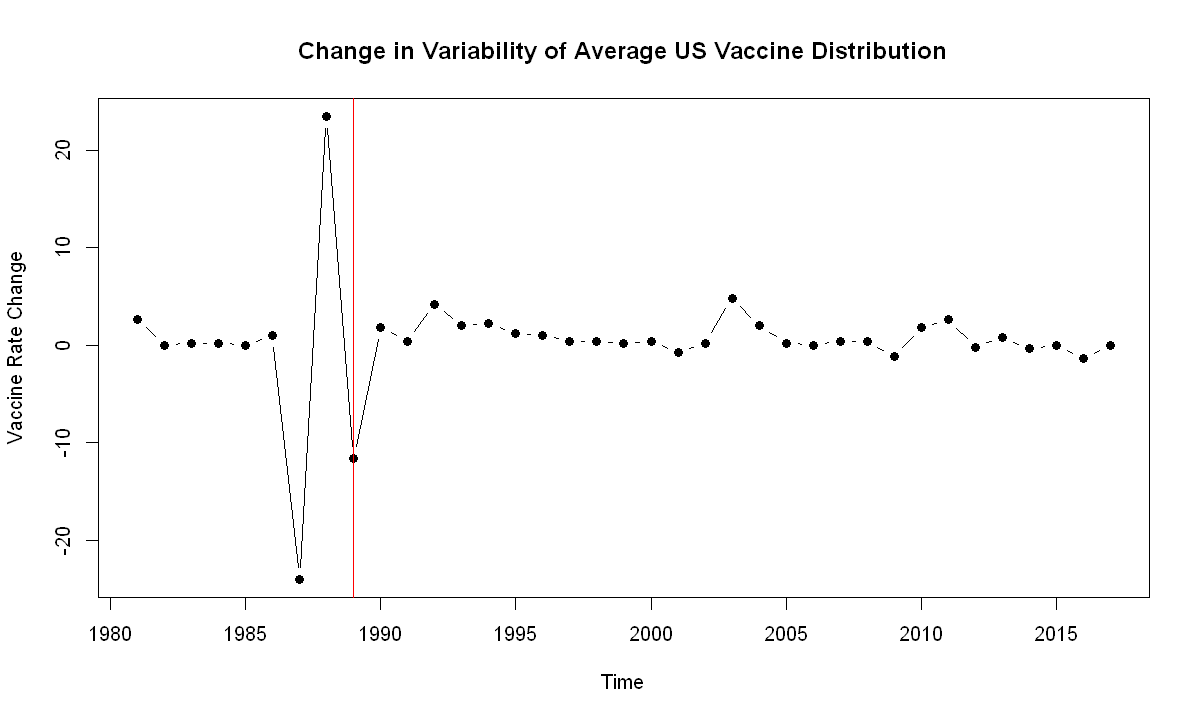

In [13]:
options(repr.plot.width=10, repr.plot.height = 6)
plot(varVacc, type="b", lwd=1, pch=19, main="Change in Variability of Average US Vaccine Distribution", ylab="Vaccine Rate Change")

#### Mean Change Point

In [14]:
meanChangeAvg <- cpt.mean(usVaccinesWAvg[,6])
meanChangeAvg

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              cpttype date version data.set method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Wed May 12 19:02:46 2021 

summary(.)  :
----------
Created Using changepoint version 2.2.2 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 10.91276 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 23 

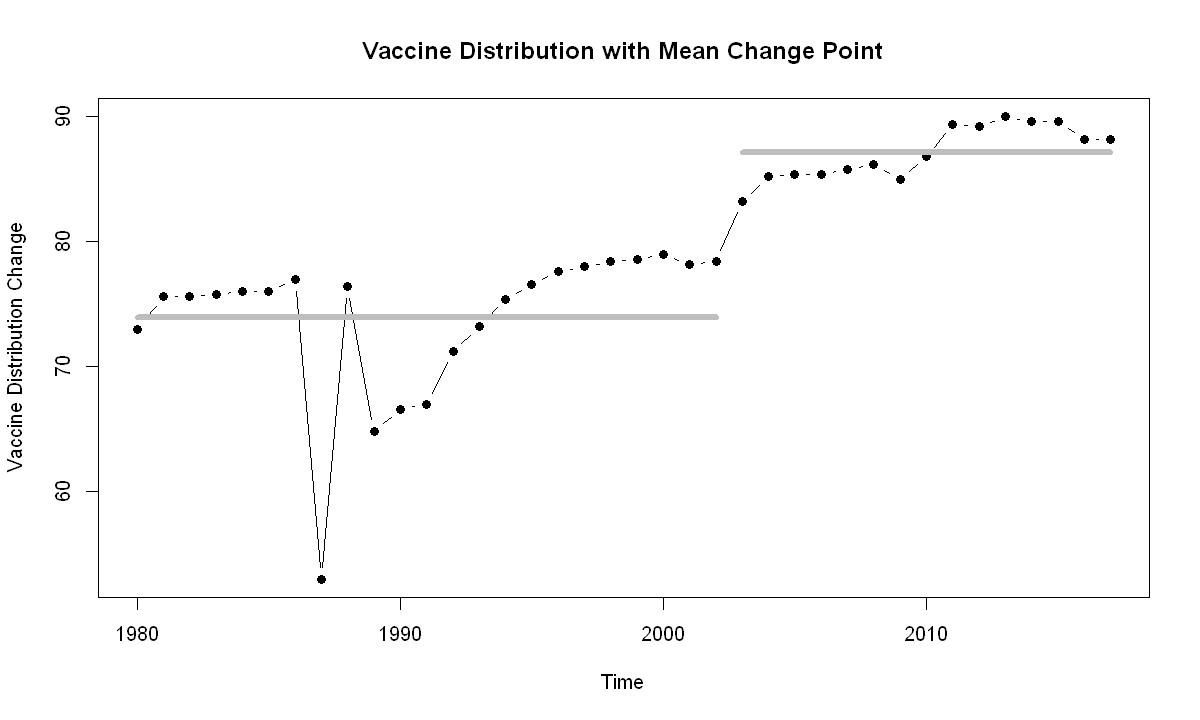

In [15]:
options(repr.plot.width=10, repr.plot.height = 6)
plot(meanChangeAvg, type="b", lwd=1, pch=19, cpt.col="grey", cpt.width=5, main="Vaccine Distribution with Mean Change Point", ylab="Vaccine Distribution Change")

### Top 5 Vaccination Rates Individually

In [16]:
# install.packages("dygraph")
library(dygraphs)
options(repr.plot.width=10, repr.plot.height = 6)
DTP1 <- usVaccines[,1]
HepB <- usVaccines[,2]
Pol3 <- usVaccines[,3]
Hib3 <- usVaccines[,4]
MCV1 <- usVaccines[,5]

In [17]:
options(repr.plot.width=10, repr.plot.height = 6)
dygraph(usVaccines, main="Top 5 Vaccine Rates 1980 - 2017 ", xlab="Year", ylab = "Vaccination Rate %") %>% 
  dyOptions(drawPoints = TRUE, pointSize = 3, colors=c("red", "purple", "blue", "orange", "green" ))%>%
  dyCSS("my.css") %>% 
  dyCallbacks(underlayCallback=JS("function(ctx, area, dygraph) {
                         ctx.strokeStyle = 'black';
                         ctx.strokeRect(area.x, area.y, area.w, area.h);
                     }"))

HTML widgets cannot be represented in plain text (need html)

#### Differences in  Top 5 Vaccine Distribution

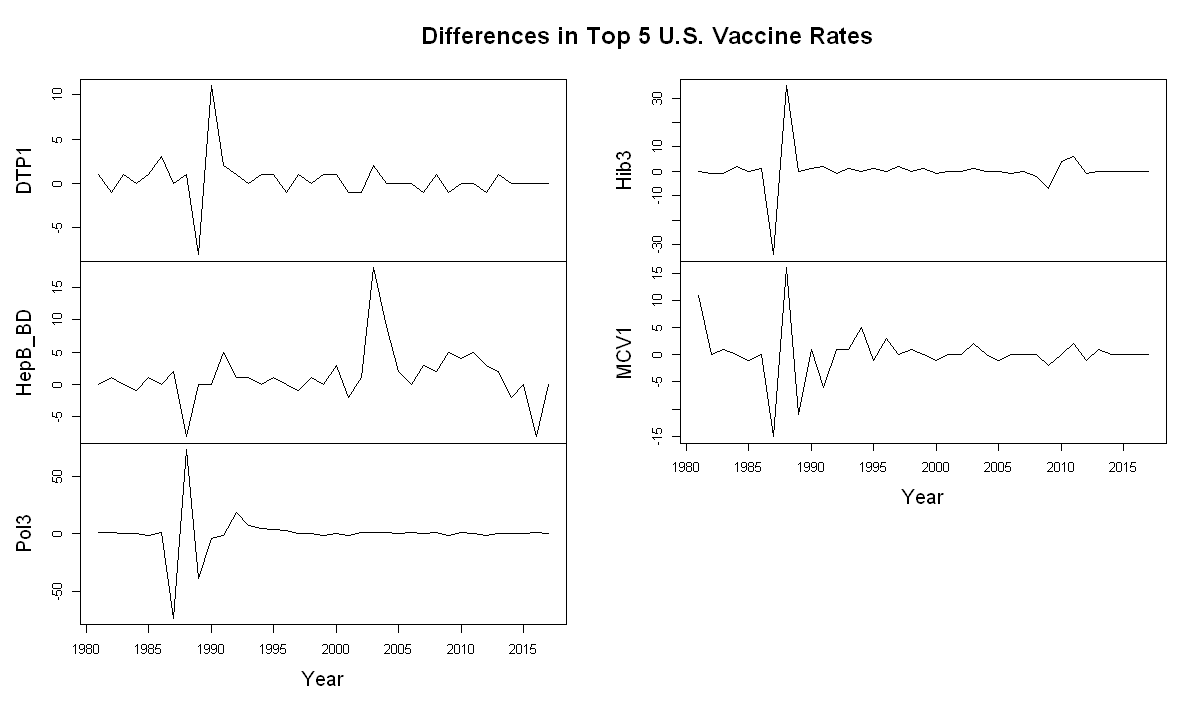

In [18]:
diffTop5 <- diff(usVaccines)
plot(diffTop5, main="Differences in Top 5 U.S. Vaccine Rates", xlab="Year")

In [19]:
dygraph(diffTop5, main="Differences in Top 5 U.S. Vaccine Rates") %>%   dyOptions(drawPoints = TRUE, pointSize = 3)

HTML widgets cannot be represented in plain text (need html)

#### Change in Variability of Top 5 Vaccines

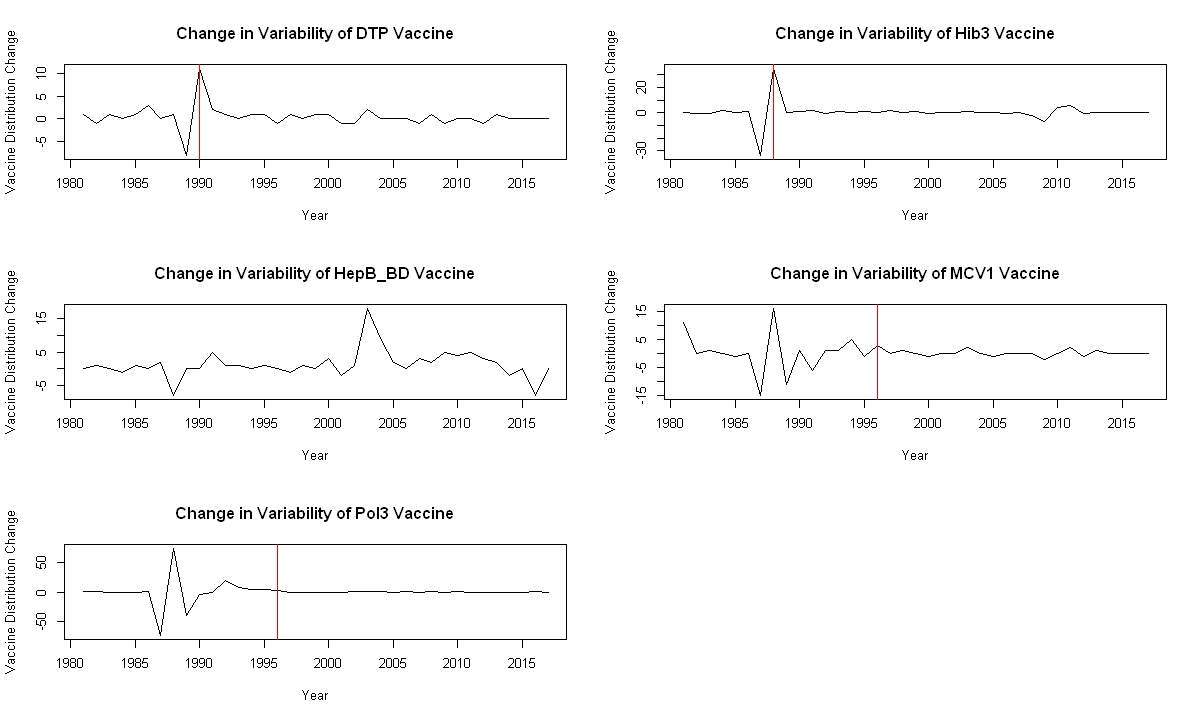

In [20]:
varDTP <- cpt.var(diffTop5[,1])
varHepB <- cpt.var(diffTop5[,2])
varPol3 <- cpt.var(diffTop5[,3])
varHib3 <- cpt.var(diffTop5[,4])
varMCV <- cpt.var(diffTop5[,5])
par(mfrow=c(3,2))
plot(varDTP, main="Change in Variability of DTP Vaccine", ylab="Vaccine Distribution Change", xlab="Year")
plot(varHib3, main="Change in Variability of Hib3 Vaccine", ylab="Vaccine Distribution Change", xlab="Year")
plot(varHepB, main="Change in Variability of HepB_BD Vaccine", ylab="Vaccine Distribution Change", xlab="Year")
plot(varMCV, main="Change in Variability of MCV1 Vaccine", ylab="Vaccine Distribution Change", xlab="Year")
plot(varPol3, main="Change in Variability of Pol3 Vaccine", ylab="Vaccine Distribution Change", xlab="Year")


####  Mean Change Point of Top 5 Vaccines Distribution

In [21]:
meanDTP <- cpt.mean(DTP1)
meanDTP
meanHep <- cpt.mean(HepB)
meanHep
meanPol3 <- cpt.mean(Pol3)
meanPol3
meanHib3 <- cpt.mean(Hib3)
meanHib3
meanMCV1 <- cpt.mean(MCV1)
meanMCV1

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              cpttype date version data.set method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Wed May 12 19:02:46 2021 

summary(.)  :
----------
Created Using changepoint version 2.2.2 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 10.91276 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 10 

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              cpttype date version data.set method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Wed May 12 19:02:46 2021 

summary(.)  :
----------
Created Using changepoint version 2.2.2 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 10.91276 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 24 

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              cpttype date version data.set method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Wed May 12 19:02:46 2021 

summary(.)  :
----------
Created Using changepoint version 2.2.2 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 10.91276 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 15 

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              cpttype date version data.set method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Wed May 12 19:02:46 2021 

summary(.)  :
----------
Created Using changepoint version 2.2.2 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 10.91276 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 8 

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              cpttype date version data.set method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Wed May 12 19:02:46 2021 

summary(.)  :
----------
Created Using changepoint version 2.2.2 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 10.91276 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 7 

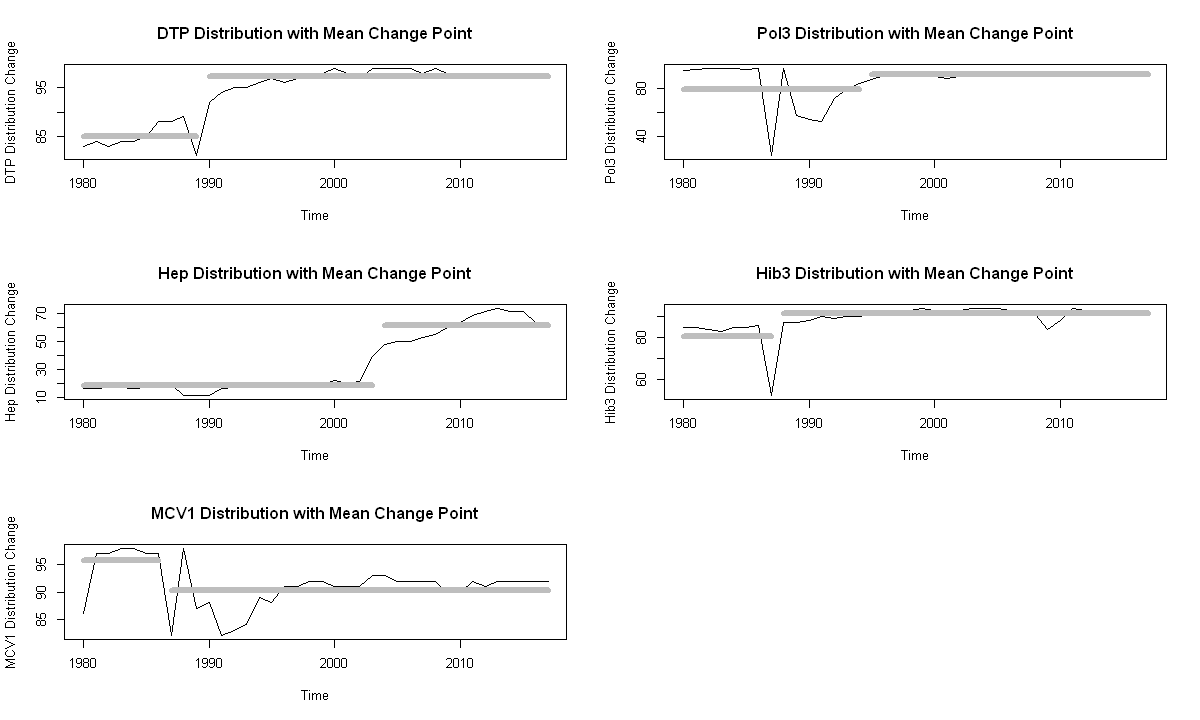

In [22]:
par(mfrow=c(3,2))
plot(meanDTP, cpt.col="grey", cpt.width=5, main="DTP Distribution with Mean Change Point", ylab="DTP Distribution Change")
plot(meanPol3, cpt.col="grey", cpt.width=5, main="Pol3 Distribution with Mean Change Point", ylab="Pol3 Distribution Change")
plot(meanHep, cpt.col="grey", cpt.width=5, main="Hep Distribution with Mean Change Point", ylab="Hep Distribution Change")
plot(meanHib3, cpt.col="grey", cpt.width=5, main="Hib3 Distribution with Mean Change Point", ylab="Hib3 Distribution Change")
plot(meanMCV1, cpt.col="grey", cpt.width=5, main="MCV1 Distribution with Mean Change Point", ylab="MCV1 Distribution Change")

## Reporting Proportion Analysis

Prepare data:

In [23]:
# head(allSchoolsReportStatus)
totCt <- nrow(allSchoolsReportStatus)
pub <- subset(allSchoolsReportStatus, pubpriv=="PUBLIC")
pubCt <- nrow(pub)
paste0("Total public schools: ", pubCt)
priv <- subset(allSchoolsReportStatus, pubpriv=="PRIVATE")
privCt <- nrow(priv)
paste0("Total private schools: ", privCt)
rYes <- nrow(subset(allSchoolsReportStatus, reported=="Y"))
paste0("Total Reported Y: ", rYes)
rNo <- nrow(subset(allSchoolsReportStatus, reported=="N"))
paste0("Total Reported N: ", rNo)
pubYes <- nrow(subset(pub, reported=="Y"))
paste0("Public Reported Y: ", pubYes)
privYes <- nrow(subset(priv, reported=="Y"))
paste0("Private Reported Y: ", privYes)
pubNo <- nrow(subset(pub, reported=="N"))
paste0("Public Reported N: ", pubNo)
privNo <- nrow(subset(priv, reported=="N"))
paste0("Private Reported N: ", privNo)

[1] "Total public schools: 5732"

[1] "Total private schools: 1649"

[1] "Total Reported Y: 6981"

[1] "Total Reported N: 400"

[1] "Public Reported Y: 5584"

[1] "Private Reported Y: 1397"

[1] "Public Reported N: 148"

[1] "Private Reported N: 252"

### Proportion of Public vs Private Schools Reporting Complete
Raw Numbers:

In [24]:
m <- matrix(c(5584, 1397, 148, 252), ncol=2, byrow=TRUE)
colnames(m) <- c("PUBLIC", "PRIVATE")
rownames(m) <- c("Reported Y", "Reported N")
m

,PUBLIC,PRIVATE
Reported Y,5584,1397
Reported N,148,252


Percent of Total:

In [25]:
mProbs <- round(m/margin.table(m), digits=2)
mProbs
mProbs[1,1]
m2 <- matrix(c((mProbs[1,1]/(mProbs[1,1]+mProbs[2,1])), (mProbs[1,2]/(mProbs[1,2]+mProbs[2,2])), (mProbs[2,1]/(mProbs[1,1]+mProbs[2,1])), (mProbs[2,2]/(mProbs[2,2]+mProbs[1,2]))), ncol=2, byrow=TRUE)
colnames(m2) <- c("PUBLIC", "PRIVATE")
rownames(m2) <- c("Reported Y", "Reported N")
m2

,PUBLIC,PRIVATE
Reported Y,0.76,0.19
Reported N,0.02,0.03


[1] 0.76

,PUBLIC,PRIVATE
Reported Y,0.97435897,0.8636364
Reported N,0.02564103,0.1363636


### Side by Side Comparison

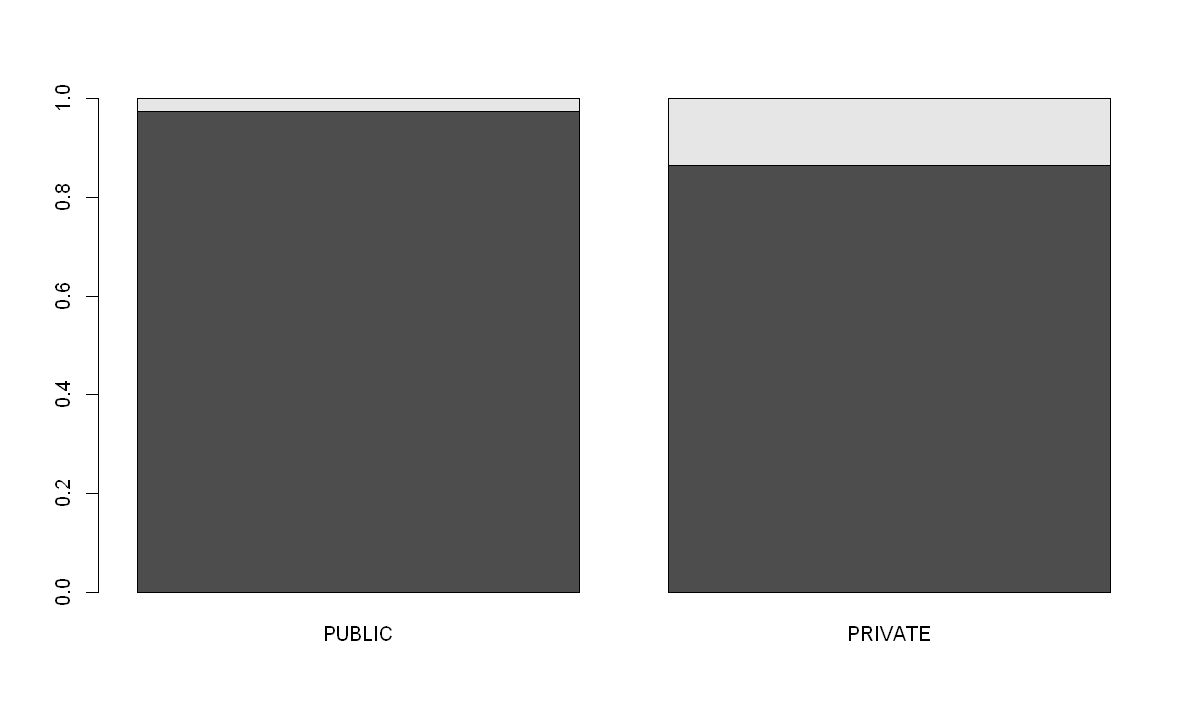

In [26]:
barplot(m2)

## California 2013 Vaccination Rates

Rework the raw data from percentages to students:

In [27]:
districts$DTP <- districts$Enrolled - round(districts$WithoutDTP*0.01*districts$Enrolled)
districts$Pol <- districts$Enrolled - round(districts$WithoutPolio*0.01*districts$Enrolled)
districts$MMR <- districts$Enrolled - round(districts$WithoutMMR*0.01*districts$Enrolled)
districts$HepB <- districts$Enrolled - round(districts$WithoutHepB*0.01*districts$Enrolled)
districts$noDTP <- round(districts$WithoutDTP*0.01*districts$Enrolled)
districts$noPol <- round(districts$WithoutPolio*0.01*districts$Enrolled)
districts$noMMR <- round(districts$WithoutMMR*0.01*districts$Enrolled)
districts$noHepB <- round(districts$WithoutHepB*0.01*districts$Enrolled)
districts$DTPRate <- (100 - districts$WithoutDTP) * 0.01
districts$PolRate <- (100 - districts$WithoutPolio) * 0.01
districts$MMRRate <- (100 - districts$WithoutMMR) * 0.01
districts$HepBRate <- (100 - districts$WithoutHepB) * 0.01

#### Discuss 2013 vaccination rates for individual vaccines DOT, Polio, MMR, and HepB

In [28]:
pctDTP <- sum(districts$DTP)/sum(districts$Enrolled)
pctMMR <- sum(districts$MMR)/sum(districts$Enrolled)
pctPol <- sum(districts$Pol)/sum(districts$Enrolled)
pctHep <- sum(districts$HepB)/sum(districts$Enrolled)
df3 <- districts[]
paste0("Total Public School Students: ", sum(districts$Enrolled))
m3 <- matrix(
            c(
                  sum(districts$DTP)
                , sum(districts$Pol)
                , sum(districts$MMR)
                , sum(districts$HepB)
                , sum(districts$noDTP)
                , sum(districts$noPol)
                , sum(districts$noMMR)
                , sum(districts$noHepB)
             )              
            , ncol=4, byrow=TRUE
           )
colnames(m3) <- c("DTP", "Pol", "MMR", "HepB")
rownames(m3) <- c("Vaccinated", "Not Vaccinated")
m3

[1] "Total Public School Students: 443046"

,DTP,Pol,MMR,HepB
Vaccinated,410821,412989,412009,421782
Not Vaccinated,32225,30057,31037,21264


#### Percentage of Vaccinations:  
**NOTE:** This shows total percentages for Vaccinated/Unvaccinated rather than a matrix.  Sum of columns = 100%.  

93% of children enrolled in public school in California in 2013 had their DTP, Polio & MMR vaccines.  7% did not.  
95% of children enrolled in public school in California in 2013 had their HepB vaccine and 5% did not.  

In [29]:
m3Probs <- round(m3/sum(districts$Enrolled), digits=2)
m3Probs <- as.table(m3Probs)
m3Probs

                DTP  Pol  MMR HepB
Vaccinated     0.93 0.93 0.93 0.95
Not Vaccinated 0.07 0.07 0.07 0.05

Nationally in 2013, 98% of Americans had received their first dose of the DPT vaccine.  93% had received Pol3 & Hib3, and 92% had received MCV1.  HepB_BD was the lowest distributed vaccine, only being given to 74% of the US public.  Interestingly, of the HepB_BD vaccination data reported for public schools was at 95% which was higher than any of the other top 5 vaccinations reported by public schools in California for that year.  

In [30]:
vac2013 <- usVaccines[34,]
vac2013

DTP1 HepB_BD    Pol3    Hib3    MCV1 
     98      74      93      93      92

## Correlations
Among districts, how are the vaccination rates for individual vaccines related? In other words, if students are missing one vaccine are they missing all of the others?

In [31]:
# install.packages("corrplot")
M<-cor(df[,2:6])
head(round(M,2))

,WithoutDTP,WithoutPolio,WithoutMMR,WithoutHepB,PctUpToDate
WithoutDTP,1.00,0.98,0.98,0.89,-0.96
WithoutPolio,0.98,1.00,0.97,0.90,-0.94
WithoutMMR,0.98,0.97,1.00,0.89,-0.97
WithoutHepB,0.89,0.90,0.89,1.00,-0.84
PctUpToDate,-0.96,-0.94,-0.97,-0.84,1.00


corrplot 0.89 loaded



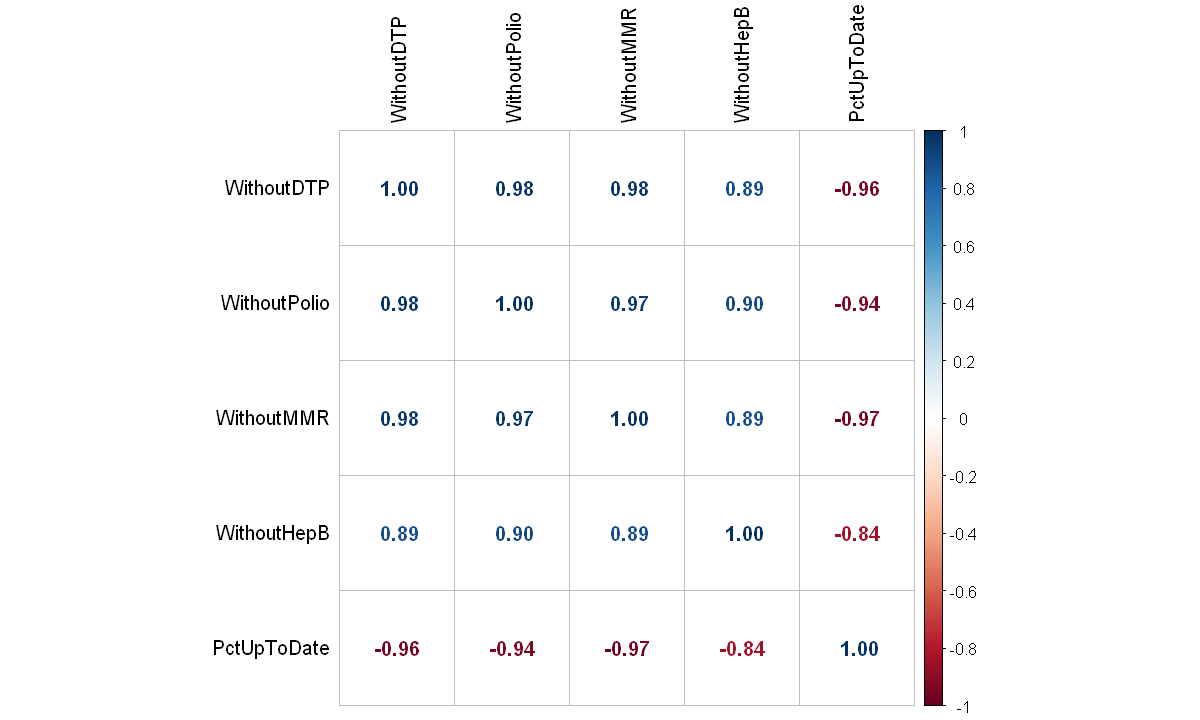

In [32]:
library(corrplot)
corrplot(M, method="number", tl.col = "black")

### Frequentist Analysis:
Run a cor.test on the correlation among **WithoutDTP**, **WithoutPolio**, **WithoutMMR** and **WithoutHepB**

#### WithoutDTP and WithoutPolio

In [33]:
cor.test(df[,"WithoutDTP"], df[,"WithoutPolio"])


	Pearson's product-moment correlation

data:  df[, "WithoutDTP"] and df[, "WithoutPolio"]
t = 138.96, df = 698, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9796141 0.9848119
sample estimates:
      cor 
0.9824022 


The cor.test results show a t-value (138.96) with an absolute value much greater than 2 and a p-value of < 2.2e-16.  Both of these support rejection of the null hypothesis that there is no correlation between the number of students who have not gotten the DTP vaccine and those who have not gotten the Polio vaccine.  As the t-value is positive, it suggests a positive correlation between the two.  The 95% confidence interval is 0.9796 to 0.9848 which is extremely narrow, indicating a high level of certainty.  Being an entirely positive range this provides further support for the positive correlation.  

#### WithoutDTP and WithoutMMR

In [34]:
cor.test(df[,"WithoutDTP"], df[,"WithoutMMR"])


	Pearson's product-moment correlation

data:  df[, "WithoutDTP"] and df[, "WithoutMMR"]
t = 121.62, df = 698, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9736091 0.9803229
sample estimates:
      cor 
0.9772091 


#### WithoutDTP and WithoutHepB

In [35]:
cor.test(df[,"WithoutDTP"], df[,"WithoutHepB"])


	Pearson's product-moment correlation

data:  df[, "WithoutDTP"] and df[, "WithoutHepB"]
t = 51.952, df = 698, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8750582 0.9056442
sample estimates:
      cor 
0.8913614 


### Bayesian Analysis of Correlation Between WithoutDTP & WithoutMMR 

In [82]:
#install.packages("BayesFactor")
library("BayesFactor")
bfCorTest <- function(x,y)
    {
    zx <- scale(x)
    zy <- scale(y)
    zData <- data.frame(x=zx, rhoNot0=zy)
    bfOut <- generalTestBF(x ~ rhoNot0, data=zData)
    mcmcOut <- posterior(bfOut, iterations=10000)
    print(summary(mcmcOut[,"rhoNot0"]))
    return(bfOut)
}


bfCorTest(df$WithoutDTP, df$WithoutPolio)
bfCorTest(df$WithoutDTP, df$WithoutMMR)
bfCorTest(df$WithoutDTP, df$WithoutHepB)


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     9.823e-01      7.139e-03      7.139e-05      7.139e-05 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.9684 0.9775 0.9824 0.9872 0.9961 



Bayes factor analysis
--------------
[1] rhoNot0 : 8.508206e+505 ±0.01%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS



Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     9.770e-01      7.992e-03      7.992e-05      7.992e-05 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.9617 0.9714 0.9771 0.9825 0.9926 



Bayes factor analysis
--------------
[1] rhoNot0 : 1.559292e+467 ±0.01%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS



Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.8907791      0.0171731      0.0001717      0.0001772 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.8577 0.8791 0.8907 0.9023 0.9242 



Bayes factor analysis
--------------
[1] rhoNot0 : 4.165612e+237 ±0.01%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS


# Predictive Analyses
## District Reporting

In [37]:
dfx <- df[,6:13]
head(dfx)

,PctUpToDate,DistrictComplete,PctBeliefExempt,PctChildPoverty,PctFreeMeal,PctFamilyPoverty,Enrolled,TotalSchools
421,79,TRUE,7,7,2,2,14,1
702,99,TRUE,1,16,69,9,122,1
760,40,FALSE,60,31,41,17,15,3
93,98,TRUE,1,21,65,10,626,6
219,96,TRUE,0,23,72,11,255,3
313,99,FALSE,0,37,93,23,105,2


In [38]:
dfx$BeliefExempt <- round(dfx$PctBeliefExempt * 0.01 * dfx$Enrolled, digits=0)
dfx$ChildPoverty <- round(dfx$PctChildPoverty * 0.01 * dfx$Enrolled, digits=0)
dfx$FreeMeal <- round(dfx$PctFreeMeal * 0.01 * dfx$Enrolled, digits=0)
dfx$FamilyPoverty <- round(dfx$PctFamilyPoverty * 0.01 * dfx$Enrolled, digits=0)
dfx$UpToDate <- round(dfx$PctUpToDate * 0.01 * dfx$Enrolled, digits=0)
dfx <- dfx[,-3:-6]
dfx <- dfx[,-1]

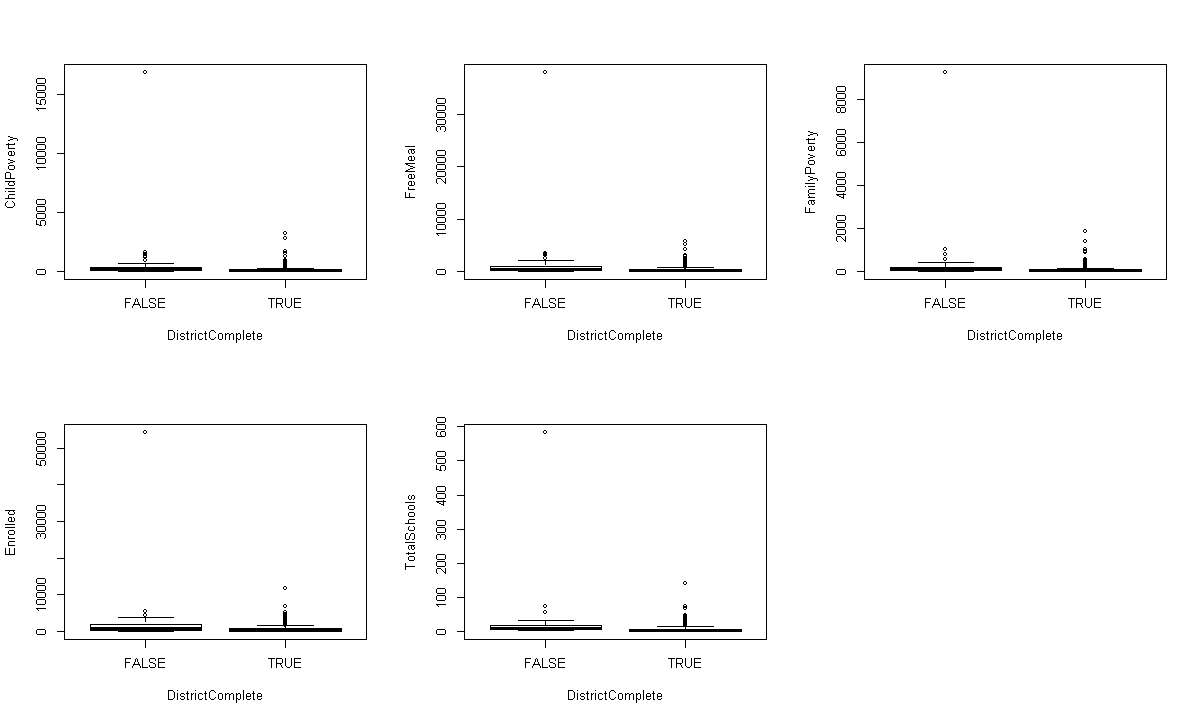

In [39]:
par(mfrow=c(2,3))
boxplot(ChildPoverty~DistrictComplete, data=dfx)
boxplot(FreeMeal~DistrictComplete, data=dfx)
boxplot(FamilyPoverty~DistrictComplete, data=dfx)
boxplot(Enrolled~DistrictComplete, data=dfx)
boxplot(TotalSchools~DistrictComplete, data=dfx)

Identify IQR Range + 1.5*IQR for each:

In [40]:
summary(dfx)

 DistrictComplete    Enrolled         TotalSchools      BeliefExempt    
 Mode :logical    Min.   :   10.00   Min.   :  1.000   Min.   :   0.00  
 FALSE:42         1st Qu.:   52.75   1st Qu.:  1.000   1st Qu.:   1.00  
 TRUE :658        Median :  221.00   Median :  3.000   Median :   6.00  
                  Mean   :  632.92   Mean   :  7.281   Mean   :  17.38  
                  3rd Qu.:  684.50   3rd Qu.:  8.000   3rd Qu.:  19.00  
                  Max.   :54238.00   Max.   :582.000   Max.   :1085.00  
  ChildPoverty        FreeMeal       FamilyPoverty        UpToDate      
 Min.   :    0.0   Min.   :    0.0   Min.   :   0.00   Min.   :    3.0  
 1st Qu.:   10.0   1st Qu.:   20.0   1st Qu.:   4.75   1st Qu.:   43.0  
 Median :   39.0   Median :   79.5   Median :  20.00   Median :  193.5  
 Mean   :  149.7   Mean   :  346.0   Mean   :  81.50   Mean   :  574.7  
 3rd Qu.:  126.5   3rd Qu.:  313.0   3rd Qu.:  68.50   3rd Qu.:  626.8  
 Max.   :16814.0   Max.   :37967.0   Max.   :9220.0

In [41]:
enrIQR = ((quantile(dfx$Enrolled, 0.75) - quantile(dfx$Enrolled, 0.25))*1.5) + quantile(dfx$Enrolled, 0.75) 
totIQR = ((quantile(dfx$TotalSchools, 0.75) - quantile(dfx$TotalSchools, 0.25))*1.5) + quantile(dfx$TotalSchools, 0.75) 
bexR = ((quantile(dfx$BeliefExempt, 0.75) - quantile(dfx$BeliefExempt, 0.25))*1.5) + quantile(dfx$BeliefExempt, 0.75) 
cpQR = ((quantile(dfx$ChildPoverty, 0.75) - quantile(dfx$ChildPoverty, 0.25))*1.5) + quantile(dfx$ChildPoverty, 0.75) 
fmQR = ((quantile(dfx$FreeMeal,0.75) - quantile(dfx$FreeMeal,0.25))*1.5) + quantile(dfx$FreeMeal,0.75) 
fpQR = ((quantile(dfx$FamilyPoverty, 0.75) - quantile(dfx$FamilyPoverty, 0.25))*1.5) + quantile(dfx$FamilyPoverty, 0.75) 
utdR = ((quantile(dfx$UpToDate, 0.75) - quantile(dfx$UpToDate, 0.25))*1.5) + quantile(dfx$UpToDate, 0.75) 

In [83]:
dfxWO <- dfx
dfx1 <- dfx[dfx$Enrolled<enrIQR & dfx$TotalSchools<totIQR & dfx$BeliefExempt<bexR & dfx$ChildPoverty<cpQR & dfx$FreeMeal < fmQR & dfx$FamilyPoverty<fpQR & dfx$UpToDate < utdR, ]

#### Boxplots showing cleaned data with outliers removed:

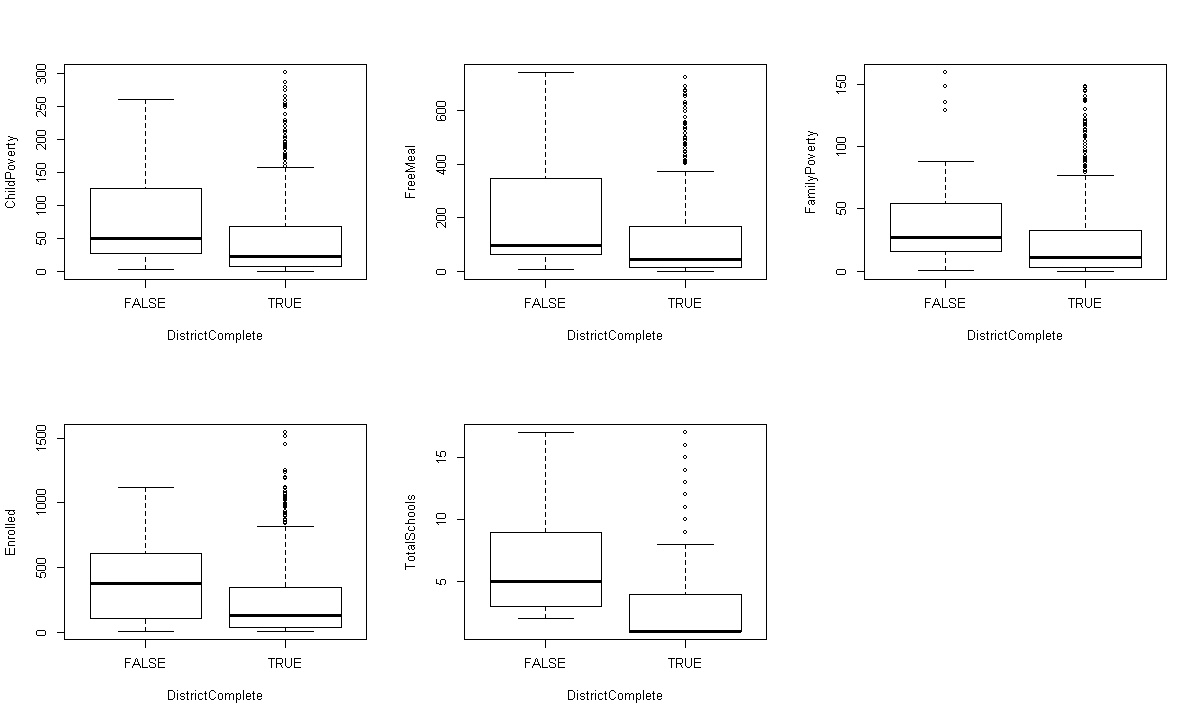

In [43]:
par(mfrow=c(2,3))
boxplot(ChildPoverty~DistrictComplete, data=dfx1)
boxplot(FreeMeal~DistrictComplete, data=dfx1)
boxplot(FamilyPoverty~DistrictComplete, data=dfx1)
boxplot(Enrolled~DistrictComplete, data=dfx1)
boxplot(TotalSchools~DistrictComplete, data=dfx1)

In [44]:
logOut <- glm(DistrictComplete ~ ChildPoverty + FreeMeal + FamilyPoverty + Enrolled + TotalSchools, family=binomial(), data=dfx1)
logOutChldPov <- glm(DistrictComplete ~ ChildPoverty, family=binomial(), data=dfx1)
logOutMeal <- glm(DistrictComplete ~ FreeMeal, family=binomial(), data=dfx1)
logOutFamPov <- glm(DistrictComplete ~ FamilyPoverty, family=binomial(), data=dfx1)
logOutEnrolled <- glm(DistrictComplete ~ Enrolled, family=binomial(), data=dfx1)
logOutTotSch <- glm(DistrictComplete ~ TotalSchools, family=binomial(), data=dfx1)
summary(logOut)


Call:
glm(formula = DistrictComplete ~ ChildPoverty + FreeMeal + FamilyPoverty + 
    Enrolled + TotalSchools, family = binomial(), data = dfx1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5719   0.1575   0.2171   0.2487   1.8660  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    4.349187   0.384340  11.316  < 2e-16 ***
ChildPoverty   0.023009   0.017652   1.303   0.1924    
FreeMeal       0.001746   0.004646   0.376   0.7071    
FamilyPoverty -0.047790   0.026097  -1.831   0.0671 .  
Enrolled       0.010124   0.002515   4.025 5.70e-05 ***
TotalSchools  -1.006606   0.188655  -5.336 9.52e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 204.41  on 560  degrees of freedom
Residual deviance: 159.12  on 555  degrees of freedom
AIC: 171.12

Number of Fisher Scoring iterations: 7


In [45]:
summary(logOutChldPov)


Call:
glm(formula = DistrictComplete ~ ChildPoverty, family = binomial(), 
    data = dfx1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6392   0.2522   0.2634   0.3002   0.6178  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   3.470608   0.286805  12.101   <2e-16 ***
ChildPoverty -0.006349   0.002518  -2.521   0.0117 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 204.41  on 560  degrees of freedom
Residual deviance: 198.92  on 559  degrees of freedom
AIC: 202.92

Number of Fisher Scoring iterations: 6


In [46]:
summary(logOutMeal)


Call:
glm(formula = DistrictComplete ~ FreeMeal, family = binomial(), 
    data = dfx1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6408   0.2510   0.2601   0.3052   0.6295  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.471919   0.283841  12.232  < 2e-16 ***
FreeMeal    -0.002695   0.001028  -2.621  0.00876 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 204.41  on 560  degrees of freedom
Residual deviance: 198.49  on 559  degrees of freedom
AIC: 202.49

Number of Fisher Scoring iterations: 6


In [47]:
summary(logOutFamPov)


Call:
glm(formula = DistrictComplete ~ FamilyPoverty, family = binomial(), 
    data = dfx1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6486   0.2497   0.2589   0.2976   0.5885  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.489522   0.285145  12.238  < 2e-16 ***
FamilyPoverty -0.012322   0.004507  -2.734  0.00625 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 204.41  on 560  degrees of freedom
Residual deviance: 197.97  on 559  degrees of freedom
AIC: 201.97

Number of Fisher Scoring iterations: 6


In [48]:
summary(logOutEnrolled)


Call:
glm(formula = DistrictComplete ~ Enrolled, family = binomial(), 
    data = dfx1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6561   0.2476   0.2630   0.3061   0.6815  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.5117476  0.2957852  11.873  < 2e-16 ***
Enrolled    -0.0014081  0.0005433  -2.592  0.00954 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 204.41  on 560  degrees of freedom
Residual deviance: 198.58  on 559  degrees of freedom
AIC: 202.58

Number of Fisher Scoring iterations: 6


In [49]:
summary(logOutTotSch)


Call:
glm(formula = DistrictComplete ~ TotalSchools, family = binomial(), 
    data = dfx1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6805   0.2145   0.2145   0.2864   0.9238  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.9557     0.3356  11.788  < 2e-16 ***
TotalSchools  -0.1956     0.0434  -4.507 6.59e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 204.41  on 560  degrees of freedom
Residual deviance: 186.73  on 559  degrees of freedom
AIC: 190.73

Number of Fisher Scoring iterations: 6


#### Complete ~ Enrolled, Family Poverty & Total Schools

In [50]:
logOut <- glm(DistrictComplete ~ FamilyPoverty + Enrolled + TotalSchools, family=binomial(), data=dfx1)
summary(logOut)


Call:
glm(formula = DistrictComplete ~ FamilyPoverty + Enrolled + TotalSchools, 
    family = binomial(), data = dfx1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3951   0.1659   0.2239   0.2491   2.0347  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    4.306152   0.379269  11.354  < 2e-16 ***
FamilyPoverty -0.006112   0.009255  -0.660    0.509    
Enrolled       0.010556   0.002506   4.212 2.53e-05 ***
TotalSchools  -0.967173   0.186556  -5.184 2.17e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 204.41  on 560  degrees of freedom
Residual deviance: 161.98  on 557  degrees of freedom
AIC: 169.98

Number of Fisher Scoring iterations: 6


#### Complete ~ Family Poverty & Total Schools

In [51]:
logOut <- glm(DistrictComplete ~ FamilyPoverty + TotalSchools, family=binomial(), data=dfx1)
summary(logOut)


Call:
glm(formula = DistrictComplete ~ FamilyPoverty + TotalSchools, 
    family = binomial(), data = dfx1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6939   0.2170   0.2193   0.2820   0.9888  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.939630   0.335885  11.729  < 2e-16 ***
FamilyPoverty  0.004199   0.007606   0.552 0.580931    
TotalSchools  -0.223627   0.066475  -3.364 0.000768 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 204.41  on 560  degrees of freedom
Residual deviance: 186.41  on 558  degrees of freedom
AIC: 192.41

Number of Fisher Scoring iterations: 6


## Final Model:
#### Complete ~ Enrolled & Total Schools

In [52]:
logOut <- glm(DistrictComplete ~ Enrolled + TotalSchools, family=binomial(), data=dfx1)
summary(logOut)


Call:
glm(formula = DistrictComplete ~ Enrolled + TotalSchools, family = binomial(), 
    data = dfx1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3477   0.1640   0.2232   0.2503   1.8986  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   4.302214   0.378510  11.366  < 2e-16 ***
Enrolled      0.010091   0.002357   4.281 1.86e-05 ***
TotalSchools -0.975511   0.185355  -5.263 1.42e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 204.41  on 560  degrees of freedom
Residual deviance: 162.40  on 558  degrees of freedom
AIC: 168.4

Number of Fisher Scoring iterations: 6


Look at the normal odds for each coefficient

In [84]:
exp(coef(logOut))

(Intercept)     Enrolled TotalSchools 
  73.8631575    1.0101417    0.3769996

In [85]:
exp(confint(logOut))

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),37.2472775,166.0207757
Enrolled,1.0057465,1.0150985
TotalSchools,0.2570009,0.5323323


#### Run chi-square test / Omnibus Test

In [55]:
anova(logOut, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,560,204.4112,NA
Enrolled,1,5.834099,559,198.5771,1.571846e-02
TotalSchools,1,36.175043,558,162.4021,1.803657e-09


Calculate the pseydo-r-squared:

In [56]:
install.packages("BaylorEdPsych_0.5.tar.gz", repos=NULL, type="source")
library("BaylorEdPsych")
PseudoR2(logOut)

McFadden     Adj.McFadden        Cox.Snell       Nagelkerke 
       0.2055129        0.1663761        0.0721476        0.2362664 
McKelvey.Zavoina           Effron            Count        Adj.Count 
       0.2681912        0.1431679        0.9554367        0.0000000 
             AIC    Corrected.AIC 
     168.4021025      168.4451904

#### Confusion Matrix

In [86]:
cm <- table(round(predict(logOut, type="response")), dfx1$DistrictComplete)
cm

   
    FALSE TRUE
  0     2    2
  1    23  534

In [87]:
cm <- round(cm/margin.table(cm), digits=3)
cm

   
    FALSE  TRUE
  0 0.004 0.004
  1 0.041 0.952

Using the selected model, 0.004 predicted false when false + 0.952 predicted true when true = 95.6% of predictions were accurate.  

## Bayesian Estimation of Logistic Regression

In [88]:
# library(Rcpp)
# install.packages("MCMCpack")
library(MCMCpack)
dfx1$DistrictComplete <- as.numeric(dfx1$DistrictComplete)
bayesLogitOut <- MCMClogit(formula=DistrictComplete~Enrolled + TotalSchools, data=dfx1)
summary(bayesLogitOut)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                 Mean       SD  Naive SE Time-series SE
(Intercept)   4.37133 0.386995 3.870e-03      1.265e-02
Enrolled      0.01058 0.002434 2.434e-05      8.204e-05
TotalSchools -1.01230 0.191174 1.912e-03      6.287e-03

2. Quantiles for each variable:

                  2.5%       25%      50%      75%    97.5%
(Intercept)   3.646875  4.107877  4.35068  4.63079  5.17022
Enrolled      0.005912  0.008909  0.01056  0.01217  0.01556
TotalSchools -1.394894 -1.141211 -1.00845 -0.87968 -0.64975


Point Estimates:  
* Intercept = 4.37
* Enrolled = 0.01
* TotalSchools = -1.01

This is not far from the coefficients from the original summary(logOut) (repeated below)  
**Coefficients:**   
XXXXXXXXXXXXXXXXX Estimate   
(Intercept)XXXXXXXXXX(4.30)    
EnrolledXXXXXXXXXXXXX(0.01)    
TotalSchoolsXXXXXXXX(-0.98)    


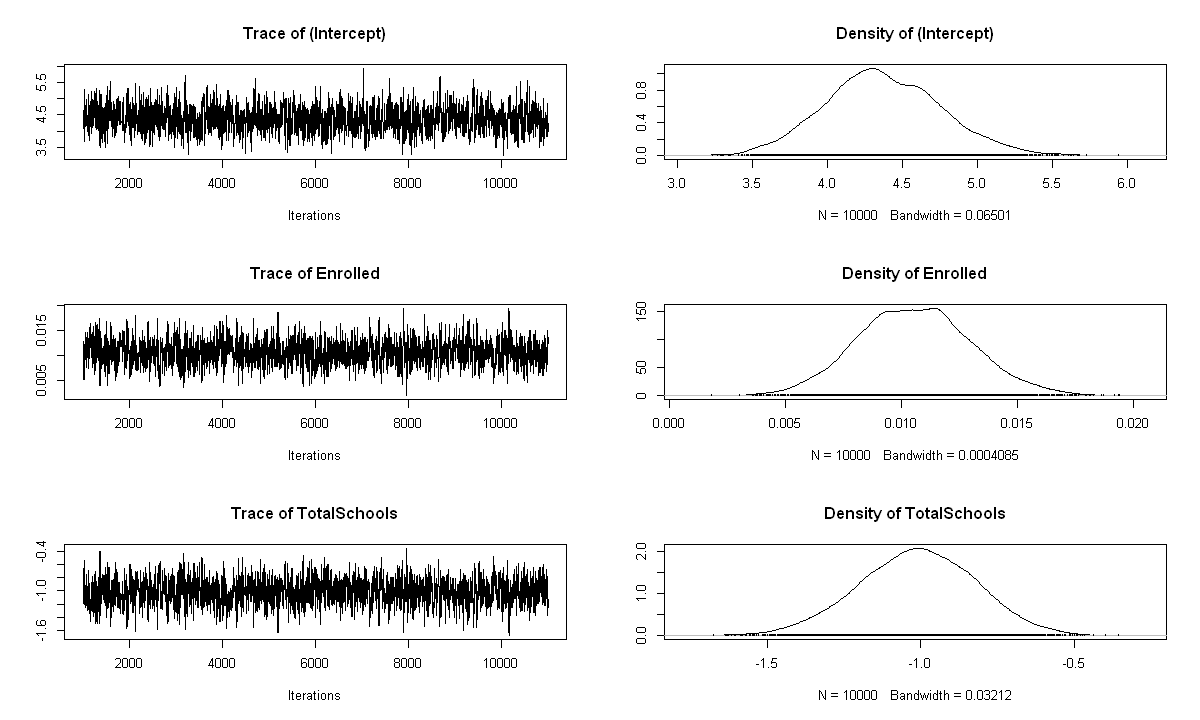

In [60]:
plot(bayesLogitOut)

In the charts above, since there is no noticable pattern of rise or drop over time, and no end is more much variable than the other end... so using the charts on the right works without needing to run more than the 10,000 iterations.

Examing the distributions in terms of regular odds instead. 

[1] "Center of Intercept Odds is 77.531"

[1] "Center of Enrolled Odds is 1.011"

[1] "Center of Total School Odds is 0.365"

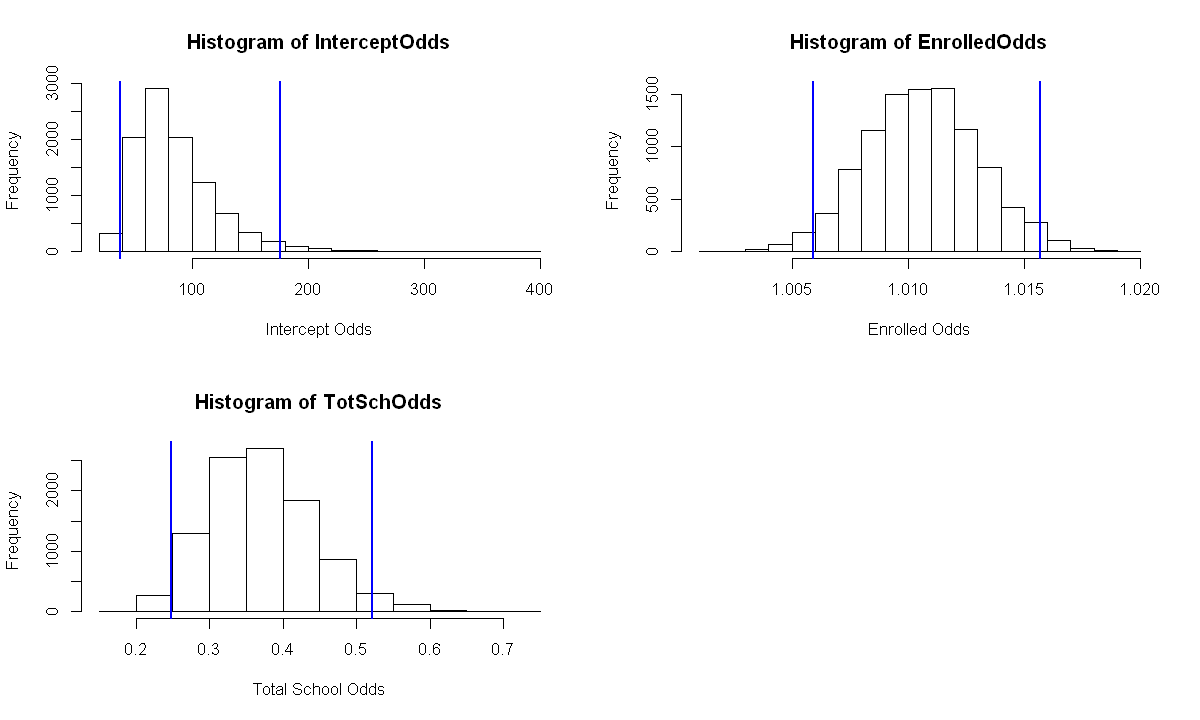

In [61]:
InterceptLogOdds <- as.matrix(bayesLogitOut[,"(Intercept)"])
InterceptOdds <- apply(InterceptLogOdds, 1, exp)
par(mfrow=c(2,2))
hist(InterceptOdds, xlab="Intercept Odds")
abline(v=quantile(InterceptOdds, c(0.025)), col="blue", lwd=2)
abline(v=quantile(InterceptOdds, c(0.975)), col="blue", lwd=2)
paste0("Center of Intercept Odds is ", round(quantile(InterceptOdds, c(0.5)), digits=3))
EnrolledLogOdds <- as.matrix(bayesLogitOut[,"Enrolled"])
EnrolledOdds <- apply(EnrolledLogOdds, 1, exp)
hist(EnrolledOdds, xlab="Enrolled Odds")
abline(v=quantile(EnrolledOdds, c(0.025)), col="blue", lwd=2)
abline(v=quantile(EnrolledOdds, c(0.975)), col="blue", lwd=2)
paste0("Center of Enrolled Odds is ", round(quantile(EnrolledOdds, c(0.5)), digits=3))
TotSchLogOdds <- as.matrix(bayesLogitOut[,"TotalSchools"])
TotSchOdds <- apply(TotSchLogOdds, 1, exp)
hist(TotSchOdds, xlab="Total School Odds")
abline(v=quantile(TotSchOdds, c(0.025)), col="blue", lwd=2)
abline(v=quantile(TotSchOdds, c(0.975)), col="blue", lwd=2)
paste0("Center of Total School Odds is ", round(quantile(TotSchOdds, c(0.5)), digits=3))

## Predict students with up to date vaccines
### Frequentist Approach

In [62]:
utd1 <- dfx1[,-4] # Remove belief exempt
utd1 <- utd1[,-1] # Remove district complete

In [63]:
utdOut <- lm(UpToDate~Enrolled + TotalSchools + ChildPoverty + FreeMeal + FamilyPoverty, data=utd1)
summary(utdOut)


Call:
lm(formula = UpToDate ~ Enrolled + TotalSchools + ChildPoverty + 
    FreeMeal + FamilyPoverty, data = utd1)

Residuals:
     Min       1Q   Median       3Q      Max 
-180.387   -4.602    3.973    7.977   84.285 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -3.60415    1.28145  -2.813  0.00509 ** 
Enrolled       0.96248    0.01069  90.077  < 2e-16 ***
TotalSchools  -4.19797    0.79805  -5.260 2.06e-07 ***
ChildPoverty  -0.17511    0.07710  -2.271  0.02352 *  
FreeMeal       0.04208    0.01996   2.108  0.03545 *  
FamilyPoverty  0.34183    0.11312   3.022  0.00263 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20.97 on 555 degrees of freedom
Multiple R-squared:  0.9942,	Adjusted R-squared:  0.9941 
F-statistic: 1.895e+04 on 5 and 555 DF,  p-value: < 2.2e-16


#### Final Model

In [64]:
utdOut <- lm(UpToDate~Enrolled + TotalSchools + FamilyPoverty, data=utd1)
summary(utdOut)


Call:
lm(formula = UpToDate ~ Enrolled + TotalSchools + FamilyPoverty, 
    data = utd1)

Residuals:
     Min       1Q   Median       3Q      Max 
-181.268   -4.660    4.110    8.157   83.464 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -3.94913    1.27860  -3.089  0.00211 ** 
Enrolled       0.96265    0.01018  94.547  < 2e-16 ***
TotalSchools  -4.14377    0.80058  -5.176 3.17e-07 ***
FamilyPoverty  0.19882    0.03990   4.984 8.34e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21.06 on 557 degrees of freedom
Multiple R-squared:  0.9941,	Adjusted R-squared:  0.9941 
F-statistic: 3.131e+04 on 3 and 557 DF,  p-value: < 2.2e-16


### Bayesian Approach
#### Bayes Factor Trial & Error

In [65]:
utdOut <- lmBF(UpToDate~ TotalSchools + ChildPoverty + FreeMeal + FamilyPoverty, data=utd1)
summary(utdOut)

Bayes factor analysis
--------------
[1] TotalSchools + ChildPoverty + FreeMeal + FamilyPoverty : 3.43556e+283 ±0%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS



In [66]:
utdOut <- lmBF(UpToDate~TotalSchools + ChildPoverty + FreeMeal, data=utd1)
summary(utdOut)

Bayes factor analysis
--------------
[1] TotalSchools + ChildPoverty + FreeMeal : 4.673765e+284 ±0%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS



In [67]:
utdOut <- lmBF(UpToDate~TotalSchools + ChildPoverty, data=utd1)
summary(utdOut)

Bayes factor analysis
--------------
[1] TotalSchools + ChildPoverty : 1.835148e+281 ±0%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS



#### Removing child poverty drops the Bayes Factor

In [68]:
utdOut <- lmBF(UpToDate~TotalSchools, data=utd1)
summary(utdOut)

Bayes factor analysis
--------------
[1] TotalSchools : 5.284907e+243 ±0.01%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS



#### Removing TotalSchools drops the Bayes Factor

In [69]:
utdOut <- lmBF(UpToDate~ChildPoverty, data=utd1)
summary(utdOut)

Bayes factor analysis
--------------
[1] ChildPoverty : 2.486127e+134 ±0.01%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS



#### Removing Enrolled drops the Bayes Factor

In [70]:
utdOut <- lmBF(UpToDate~TotalSchools + FamilyPoverty, data=utd1)
summary(utdOut)

Bayes factor analysis
--------------
[1] TotalSchools + FamilyPoverty : 5.643081e+274 ±0%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS



### Bayes Regression

In [71]:
utdMCMCOut <- lmBF(UpToDate~Enrolled + TotalSchools + FamilyPoverty, data=utd1, posterior=TRUE, iterations=10000)
summary(utdMCMCOut)


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                  Mean        SD  Naive SE Time-series SE
mu            230.9740   0.89653 0.0089653      0.0088057
Enrolled        0.9626   0.01026 0.0001026      0.0001026
TotalSchools   -4.1437   0.82215 0.0082215      0.0084091
FamilyPoverty   0.1995   0.04004 0.0004004      0.0004181
sig2          446.4864  28.07776 0.2807776      0.2807776
g              80.5528 132.75031 1.3275031      1.3275031

2. Quantiles for each variable:

                  2.5%      25%      50%      75%    97.5%
mu            229.2222 230.3754 230.9729 231.5895 232.6996
Enrolled        0.9422   0.9558   0.9626   0.9694   0.9827
TotalSchools   -5.7162  -4.6937  -4.1416  -3.5978  -2.5480
FamilyPoverty   0.1218   0.1728   0.1995   0.2256   0.2793
sig2          395.7823 427.4961 445.3254 463.9158 503.7542
g         

##  Predict students with belief exemptions
### Frequentist Approach

In [72]:
dfx2 <- dfx1[, -1] # remove District Complete

#### Attempt 1 - all variables model:

In [73]:
blfOut <- lm(BeliefExempt~Enrolled+TotalSchools	+ChildPoverty+FreeMeal+FamilyPoverty+UpToDate, data=dfx2)
summary(blfOut)


Call:
lm(formula = BeliefExempt ~ Enrolled + TotalSchools + ChildPoverty + 
    FreeMeal + FamilyPoverty + UpToDate, data = dfx2)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.990  -3.124  -1.564   2.247  27.814 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.229208   0.431943   5.161 3.43e-07 ***
Enrolled       0.175574   0.014134  12.422  < 2e-16 ***
TotalSchools   0.871348   0.273684   3.184  0.00154 ** 
ChildPoverty   0.036939   0.025926   1.425  0.15479    
FreeMeal      -0.046006   0.006707  -6.860 1.85e-11 ***
FamilyPoverty -0.016778   0.038172  -0.440  0.66044    
UpToDate      -0.162776   0.014207 -11.457  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.018 on 554 degrees of freedom
Multiple R-squared:  0.5266,	Adjusted R-squared:  0.5214 
F-statistic: 102.7 on 6 and 554 DF,  p-value: < 2.2e-16


#### Revision 2: Removing FamilyPoverty, ChildPoverty & TotalSchools

In [74]:
blfOut <- lm(BeliefExempt~Enrolled+FreeMeal+UpToDate, data=dfx2)
summary(blfOut)


Call:
lm(formula = BeliefExempt ~ Enrolled + FreeMeal + UpToDate, data = dfx2)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.208  -3.071  -1.732   2.088  28.415 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.78069    0.40464   6.872  1.7e-11 ***
Enrolled     0.19508    0.01276  15.292  < 2e-16 ***
FreeMeal    -0.03627    0.00380  -9.545  < 2e-16 ***
UpToDate    -0.17292    0.01384 -12.490  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.08 on 557 degrees of freedom
Multiple R-squared:  0.5156,	Adjusted R-squared:  0.5129 
F-statistic: 197.6 on 3 and 557 DF,  p-value: < 2.2e-16


### Bayesian Linear Regression

In [75]:
dfMCMCOut <- lmBF(BeliefExempt~Enrolled+TotalSchools+ChildPoverty+FreeMeal+FamilyPoverty+UpToDate, data=dfx2, posterior=TRUE, iterations=10000)
summary(dfMCMCOut)


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                  Mean      SD  Naive SE Time-series SE
mu             7.88281 0.29744 0.0029744      0.0029744
Enrolled       0.17385 0.01415 0.0001415      0.0001415
TotalSchools   0.86364 0.27470 0.0027470      0.0027272
ChildPoverty   0.03633 0.02591 0.0002591      0.0002628
FreeMeal      -0.04549 0.00673 0.0000673      0.0000673
FamilyPoverty -0.01649 0.03825 0.0003825      0.0003891
UpToDate      -0.16120 0.01425 0.0001425      0.0001425
sig2          49.47572 2.93750 0.0293750      0.0298159
g              0.24285 0.20475 0.0020475      0.0020475

2. Quantiles for each variable:

                  2.5%      25%      50%      75%    97.5%
mu             7.29727  7.68572  7.88519  8.08058  8.45770
Enrolled       0.14619  0.16441  0.17360  0.18336  0.20158
TotalSchools   0.33225  0.68147  

Variables w/ HDI spanning 0:
* ChildPoverty
* FamilyPoverty

In [76]:
dfMCMCOut <- lmBF(BeliefExempt~Enrolled+TotalSchools+FreeMeal+UpToDate, data=dfx2, posterior=TRUE, iterations=10000)
summary(dfMCMCOut)


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                 Mean       SD  Naive SE Time-series SE
mu            7.88061 0.299409 2.994e-03      2.994e-03
Enrolled      0.17539 0.014091 1.409e-04      1.409e-04
TotalSchools  0.82508 0.269761 2.698e-03      2.698e-03
FreeMeal     -0.03568 0.003743 3.743e-05      3.743e-05
UpToDate     -0.16176 0.014174 1.417e-04      1.417e-04
sig2         49.61292 3.021595 3.022e-02      3.121e-02
g             0.40873 1.196837 1.197e-02      1.197e-02

2. Quantiles for each variable:

                 2.5%     25%      50%      75%    97.5%
mu            7.28348  7.6798  7.88151  8.08338  8.46072
Enrolled      0.14785  0.1660  0.17536  0.18484  0.20337
TotalSchools  0.29803  0.6423  0.82508  1.01017  1.34715
FreeMeal     -0.04307 -0.0382 -0.03565 -0.03317 -0.02841
UpToDate     -0.18951 -0.1713 -0.1617

## Bayes Factor Comparisons
Model with Total Schools:

In [77]:
dfMCMC <- lmBF(BeliefExempt~Enrolled+TotalSchools+FreeMeal+UpToDate, data=dfx2)
summary(dfMCMC)

Bayes factor analysis
--------------
[1] Enrolled + TotalSchools + FreeMeal + UpToDate : 2.865964e+84 ±0%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS



Model without Total schools:

In [78]:
dfMCMC <- lmBF(BeliefExempt~Enrolled+FreeMeal+UpToDate, data=dfx2)
summary(dfMCMC)

Bayes factor analysis
--------------
[1] Enrolled + FreeMeal + UpToDate : 4.151011e+83 ±0%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS

